In [3]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [2]:
import os

# Set the environment variable to enable CPU fallback for MPS
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [4]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F

import torchvision.transforms as transforms

In [119]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [8]:
transform = transforms.Compose([
	transforms.ToTensor()
])

ImageNet_train = torchvision.datasets.ImageNet(
	root='/Users/moose/Documents/PyCharm_Projects/EyesOff2/paper_implementations',
	train=True,
	download=True,
	transform=transform,
)

ImageNet_test = torchvision.datasets.ImageNet(
	root='/Users/moose/Documents/PyCharm_Projects/EyesOff2/paper_implementations',
	train=False,
	download=True,
	transform=transform,
)

RuntimeError: The archive ILSVRC2012_img_train.tar is not present in the root directory or is corrupted. You need to download it externally and place it in /Users/moose/Documents/PyCharm_Projects/EyesOff2/paper_implementations.

In [83]:
class AlexNet(nn.Module):
	def __init__(self):
		super().__init__()
		
		self.conv1 = nn.Conv2d(
			kernel_size=(11, 11),
			in_channels=3,
			out_channels=96,
			stride=4,
		)
		self.relu1 = nn.ReLU()
		self.LRN1 = nn.LocalResponseNorm(
			size=5, alpha=10**(-4), beta=0.75, k=2
		)
		self.maxpool1 = nn.MaxPool2d(
			kernel_size=(3, 3),
			stride=(2, 2),
		)
		
		self.conv2 = nn.Conv2d(
			kernel_size=(5, 5),
			in_channels=96,
			out_channels=256,
			padding=2,
		)
		self.relu2 = nn.ReLU()
		self.LRN2 = nn.LocalResponseNorm(
			size=5, alpha=10**(-4), beta=0.75, k=2
		)
		self.maxpool2 = nn.MaxPool2d(
			kernel_size=(3, 3),
			stride=2,
		)
		
		self.conv3 = nn.Conv2d(
			kernel_size=(3, 3),
			in_channels=256,
			out_channels=384,
			padding=1,
		)
		self.relu3 = nn.ReLU()
		
		self.conv4 = nn.Conv2d(
			kernel_size=(3, 3),
			in_channels=384,
			out_channels=384,
			padding=1
		)
		self.relu4 = nn.ReLU()
		
		self.conv5 = nn.Conv2d(
			kernel_size=(3, 3),
			in_channels=384,
			out_channels=256,
			padding=1
		)
		self.relu5 = nn.ReLU()
		self.maxpool3 = nn.MaxPool2d(
			kernel_size=(3, 3),
			stride=2
		)
		
		self.fc1 = nn.Linear(9216, 4096)
		self.relu6 = nn.ReLU()
		self.dropout1 = nn.Dropout(p=0.5)
		
		self.fc2 = nn.Linear(4096, 4096)
		self.relu7 = nn.ReLU()
		self.dropout2 = nn.Dropout(p=0.5)
		
		#self.fc3 = nn.Linear(4096, 1000)
		self.fc3 = nn.Linear(4096, 10)  # If using CIFAR10
		# self.relu8 = nn.ReLU() is this supposed to be here?
		#self.softmax = nn.Softmax()
		
	def forward(self, x):
		# This block represents first convolution
		x = self.conv1(x)
		#print(f'Shape after conv1: {x.shape}')
		x = self.relu1(x)
		#print(f'Shape after ReLU1: {x.shape}')
		x = self.LRN1(x)
		#print(f'Shape after LRN1: {x.shape}')
		x = self.maxpool1(x)
		#print(f'Shape after MP1: {x.shape}\n')
		
		# Second convolution
		x = self.conv2(x)
		#print(f'Shape after conv2: {x.shape}')
		x = self.relu2(x)
		#print(f'Shape after ReLU2: {x.shape}')
		x = self.LRN2(x)
		#print(f'Shape after LRN2: {x.shape}')
		x = self.maxpool2(x)
		#print(f'Shape after MP2: {x.shape}\n')
		
		# Third convolution
		x = self.conv3(x)
		#print(f'Shape after conv3: {x.shape}')
		x = self.relu3(x)
		#print(f'Shape after ReLU3: {x.shape}\n')
		
		# Fourth convolution
		x = self.conv4(x)
		#print(f'Shape after conv4: {x.shape}')
		x = self.relu4(x)
		#print(f'Shape after relu4: {x.shape}\n')
		
		# Fifth convolution
		x = self.conv5(x)
		#print(f'Shape after conv5: {x.shape}')
		x = self.relu5(x)
		#print(f'Shape after relu5: {x.shape}')
		x = self.maxpool3(x)
		#print(f'Shape after MP3: {x.shape}\n')
		
		# Before passing to the fully connected layer we must flatten the tensor as nn.Linear expects a matrix (2d input)
		x = torch.flatten(x, start_dim=1)
		#print(x.shape)
		
		# First fully connected layer
		x = self.fc1(x)
		#print(f'Shape after fc1: {x.shape}')
		x = self.relu6(x)
		#print(f'Shape after relu6: {x.shape}')
		x = self.dropout1(x)
		#print(f'Shape after dropout1: {x.shape}\n')
	
		# Second fully connected layer
		x = self.fc2(x)
		#print(f'Shape after fc2: {x.shape}')
		x = self.relu7(x)
		#print(f'Shape after relu7: {x.shape}')
		x = self.dropout2(x)
		#print(f'Shape after dropout2: {x.shape}\n')
		
		# Final FC layer
		x = self.fc3(x)
		#print(f'Shape after fc3: {x.shape}')
		# x = self.relu8(x)
		#print(f'Shape after relu8: {x.shape}')
		#x = self.softmax(x)
		#print(f'Shape after softmax: {x.shape}\n')
		
		return x
	
net = AlexNet()	

In [61]:
# Create a dummy input tensor with the expected input size
# Assuming the input size is (batch_num, channels, height, width)
dummy_input = torch.randn(1, 3, 227, 227)  # For example, a single 32x32 RGB image

# Pass the dummy input through the network
output = net(dummy_input)

In [101]:
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((227, 227)),  # Resize images to 227x227 if adapting original AlexNet
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize images
])

# Load datasets
train_dataset = CIFAR10(root='./CIFAR', train=True, download=True, transform=transform)
test_dataset = CIFAR10(root='./CIFAR', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


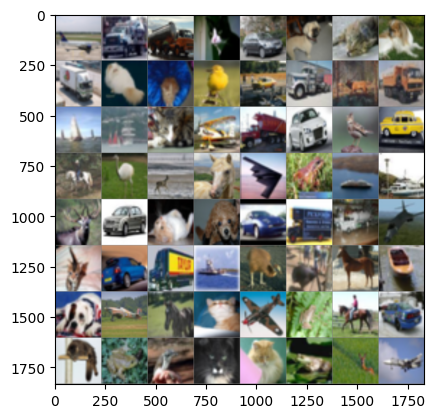

In [102]:
# Let's show some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
	img = img / 2 + 0.5  # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [103]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [104]:
net.to(device)

AlexNet(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (relu1): ReLU()
  (LRN1): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
  (maxpool1): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (LRN2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
  (maxpool2): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (maxpool3): MaxPool2d(kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (relu6): ReLU()
  (dropout1): Dropout(p=0.5, inpl

In [109]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.005, weight_decay=0.0005, momentum=0.9)

In [110]:
for epoch in range(90):
	running_loss = 0.0
	
	for i, data in enumerate(train_loader, 0):
		inputs, labels = data
		inputs, labels = inputs.to(device), labels.to(device)
		#labels = labels.to(torch.float32)
		optimizer.zero_grad()
		
		outputs = net(inputs)
		loss = criterion(outputs, labels)
		#print(loss.dtype, labels.dtype)
		loss.backward()
		optimizer.step()
		
		running_loss += loss.item()
	
	# Move this print statement outside the inner loop
	print(f'Epoch [{epoch + 1}] loss: {running_loss / len(train_loader):.3f}')
	running_loss = 0.0
	
	correct = 0
	total = 0
	# since we're not training, we don't need to calculate the gradients for our outputs
	with torch.no_grad():
		for data in test_loader:
			images, labels = data
			# Push images to mps gpu
			images, labels = images.to(device), labels.to(device)
			
			# calculate outputs by running images through the network
			outputs = net(images)
			# the class with the highest energy is what we choose as prediction
			_, predicted = torch.max(outputs.data, 1)
			total += labels.size(0)
			correct += (predicted == labels).sum().item()

	print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

print('Finished Training')

Epoch [1] loss: 1.439
Accuracy of the network on the 10000 test images: 50 %
Epoch [2] loss: 1.220
Accuracy of the network on the 10000 test images: 59 %
Epoch [3] loss: 1.025
Accuracy of the network on the 10000 test images: 66 %
Epoch [4] loss: 0.858
Accuracy of the network on the 10000 test images: 65 %
Epoch [5] loss: 0.745
Accuracy of the network on the 10000 test images: 70 %
Epoch [6] loss: 0.652
Accuracy of the network on the 10000 test images: 73 %
Epoch [7] loss: 0.566
Accuracy of the network on the 10000 test images: 77 %
Epoch [8] loss: 0.491
Accuracy of the network on the 10000 test images: 77 %
Epoch [9] loss: 0.428
Accuracy of the network on the 10000 test images: 78 %
Epoch [10] loss: 0.364
Accuracy of the network on the 10000 test images: 80 %
Epoch [11] loss: 0.306
Accuracy of the network on the 10000 test images: 81 %
Epoch [12] loss: 0.253
Accuracy of the network on the 10000 test images: 80 %
Epoch [13] loss: 0.204
Accuracy of the network on the 10000 test images: 

KeyboardInterrupt: 

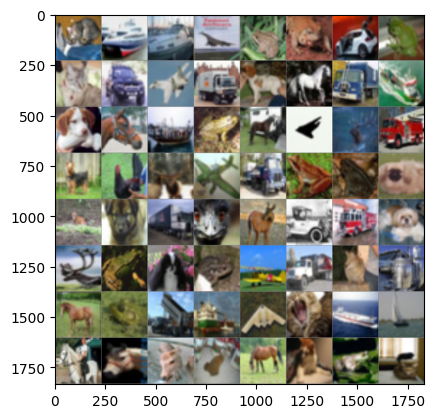

In [114]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))

# Push images to mps gpu
images, labels = images.to(device), labels.to(device)

In [115]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
predicted

tensor([3, 8, 8, 0, 6, 6, 3, 6, 3, 1, 0, 9, 4, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        4, 2, 4, 0, 9, 6, 6, 5, 2, 5, 9, 3, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 3,
        7, 6, 9, 8, 3, 3, 8, 8, 7, 7, 3, 3, 7, 5, 6, 9], device='mps:0')

In [116]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
	for data in test_loader:
		images, labels = data
		# Push images to mps gpu
		images, labels = images.to(device), labels.to(device)
		
		# calculate outputs by running images through the network
		outputs = net(images)
		# the class with the highest energy is what we choose as prediction
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 81 %


In [113]:
# Model class must be defined somewhere
model = torch.save(net, '/Users/moose/Documents/PyCharm_Projects/EyesOff2/paper_implementations/AlexNet_Cifar10.pth')